## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, fig, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
%matplotlib inline
def loss_plot(model_name):
    score = model_name.evaluate(X_test, Y_test, verbose=0) 
    print('Test score:', score[0]) 
    print('Test accuracy:', score[1])

    fig, ax = plt.subplots(1,1, figsize=(10,6))
    ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    ax.set_title('Variation of Loss with epochs')

    # list of epoch numbers
    x = list(range(1,nb_epoch+1))

    # print(history.history.keys())
    # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
    # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

    # we will get val_loss and val_acc only when you pass the paramter validation_data
    # val_loss : validation loss
    # val_acc : validation accuracy

    # loss : training loss
    # acc : train accuracy
    # for each key in histrory.histrory we will have a list of length equal to number of epochs


    vy = history.history['val_loss']
    ty = history.history['loss']
    plt_dynamic(x, vy, ty, fig, ax)

In [0]:
def weight_plot(model_name):
    w_after = model_name.get_weights()

    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)

    fig = plt.figure(figsize=(15,7))
    fig.suptitle("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')

    plt.subplot(1, 3, 2)
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')

    plt.subplot(1, 3, 3)
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

## Architecture 1 : Layer1(600), Layer2(100)

<h2>i) MLP + ReLU + ADAM </h2>

In [0]:
import warnings
warnings.filterwarnings("ignore") 

In [0]:
model_relu1 = Sequential()
model_relu1.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu1.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu1.add(Dense(output_dim, activation='softmax'))

print(model_relu1.summary())

model_relu1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_43 (Dense)             (None, 100)               60100     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1010      
Total params: 532,110
Trainable params: 532,110
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2137 - acc: 0.9351 - val_loss: 0.1095 - val_acc: 0.9665
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0815 - acc: 0.9755 - val_loss: 0.0956 - val_acc: 0.9713
Epoch 3/20
60000/60000 [========================

Test score: 0.08545361435633295
Test accuracy: 0.9838


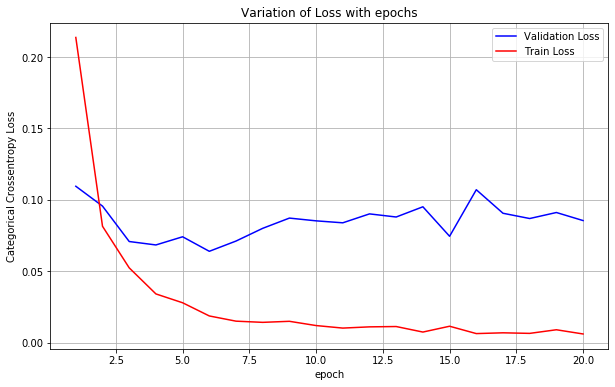

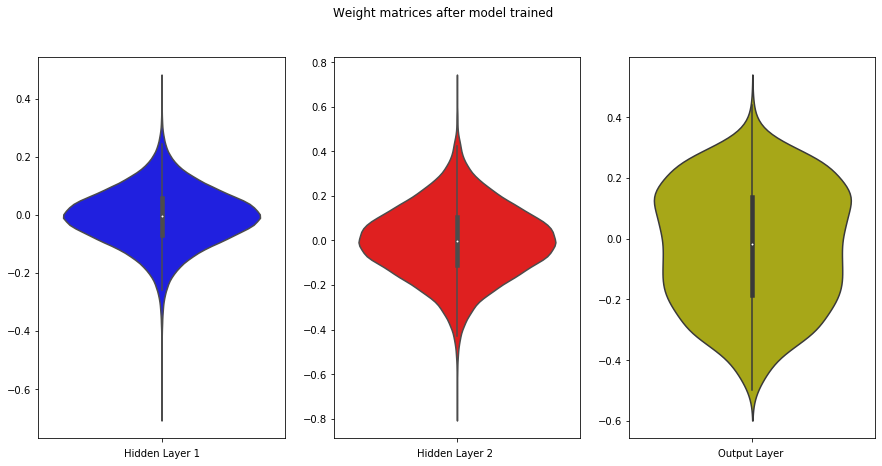

In [0]:
loss_plot(model_relu1)
weight_plot(model_relu1)

<h2>ii) MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [0]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch1 = Sequential()

model_batch1.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch1.add(BatchNormalization())

model_batch1.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch1.add(BatchNormalization())

model_batch1.add(Dense(output_dim, activation='softmax'))


model_batch1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_17 (Batc (None, 600)               2400      
_________________________________________________________________
dense_46 (Dense)             (None, 100)               60100     
_________________________________________________________________
batch_normalization_18 (Batc (None, 100)               400       
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1010      
Total params: 534,910
Trainable params: 533,510
Non-trainable params: 1,400
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.1981 - acc: 0.9432 - val_loss: 0.1175 - val_acc: 0.9615
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0740 - acc: 0.9783 - val_loss: 0.0847 - val_acc: 0.9719
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0452 - acc: 0.9870 - val_loss: 0.0938 - val_acc: 0.9698
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0336 - acc: 0.9897 - val_loss: 0.0774 - val_acc: 0.9750
Epoch 5/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0247 - acc: 0.9926 - val_loss: 0.0732 - val_acc: 0.9788
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0181 - acc: 0.9946 - val_loss: 0.0854 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.0199 - acc: 0.9939 - val_loss: 0.0801 - va

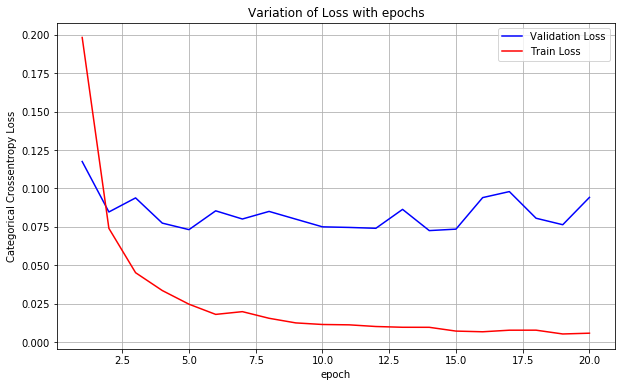

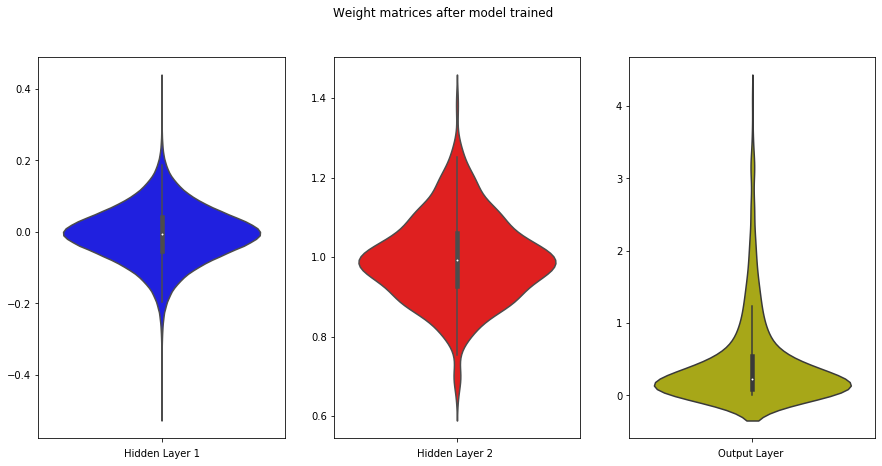

In [0]:
model_batch1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
loss_plot(model_batch1)
weight_plot(model_batch1)

<h2>iii) MLP + Dropout + AdamOptimizer </h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop1 = Sequential()

model_drop1.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))

model_drop1.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop1.add(BatchNormalization())
model_drop1.add(Dropout(0.5))

model_drop1.add(Dense(output_dim, activation='softmax'))


model_drop1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_19 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_15 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 100)               60100     
_________________________________________________________________
batch_normalization_20 (Batc (None, 100)               400       
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)              

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.4840 - acc: 0.8543 - val_loss: 0.1615 - val_acc: 0.9512
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.2502 - acc: 0.9259 - val_loss: 0.1224 - val_acc: 0.9597
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.2020 - acc: 0.9401 - val_loss: 0.1041 - val_acc: 0.9685
Epoch 4/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.1717 - acc: 0.9490 - val_loss: 0.0921 - val_acc: 0.9713
Epoch 5/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1552 - acc: 0.9533 - val_loss: 0.0873 - val_acc: 0.9731
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1393 - acc: 0.9583 - val_loss: 0.0802 - val_acc: 0.9752
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1280 - acc: 0.9612 - val_loss: 0.0845 - va

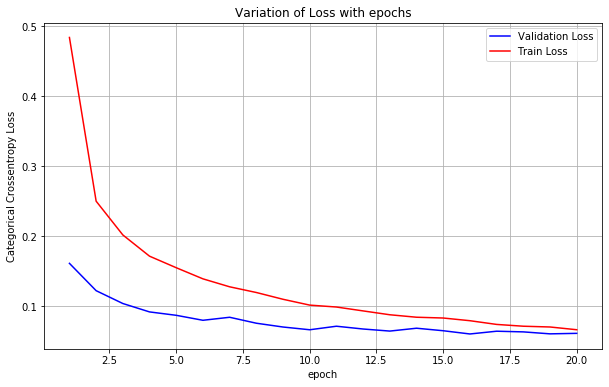

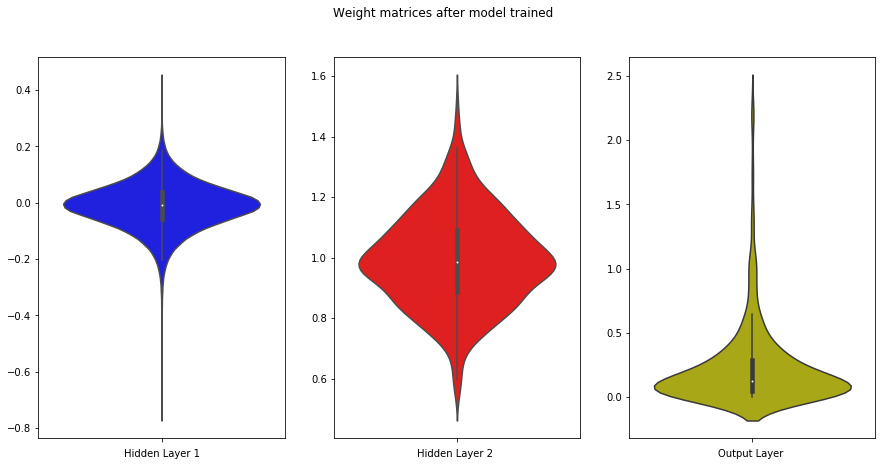

In [0]:
model_drop1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
loss_plot(model_drop1)
weight_plot(model_drop1)

## Architecture 2 : Layer1(500), Layer2(250), Layer3(125)

<h2>i) MLP + ReLU + ADAM </h2>

In [0]:
import warnings
warnings.filterwarnings("ignore") 

In [0]:
model_relu2 = Sequential()
model_relu2.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu2.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu2.add(Dense(125, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu2.add(Dense(output_dim, activation='softmax'))

print(model_relu2.summary())

model_relu2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_52 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_53 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_54 (Dense)             (None, 10)                1260      
Total params: 550,385
Trainable params: 550,385
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.2180 - acc: 0.9334 - val_loss: 0.0955 - val_acc: 0.9715
Epoch 2/20
60000/60000 [============================

Test score: 0.10277052689156026
Test accuracy: 0.9808


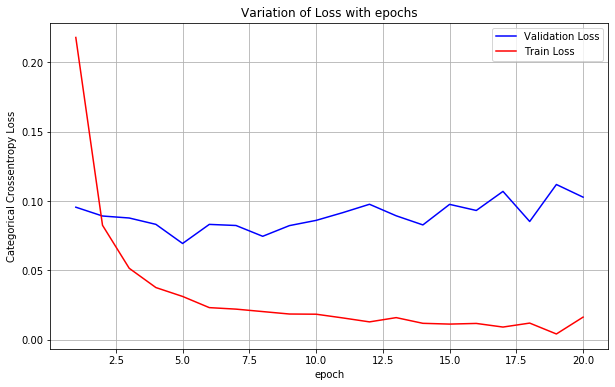

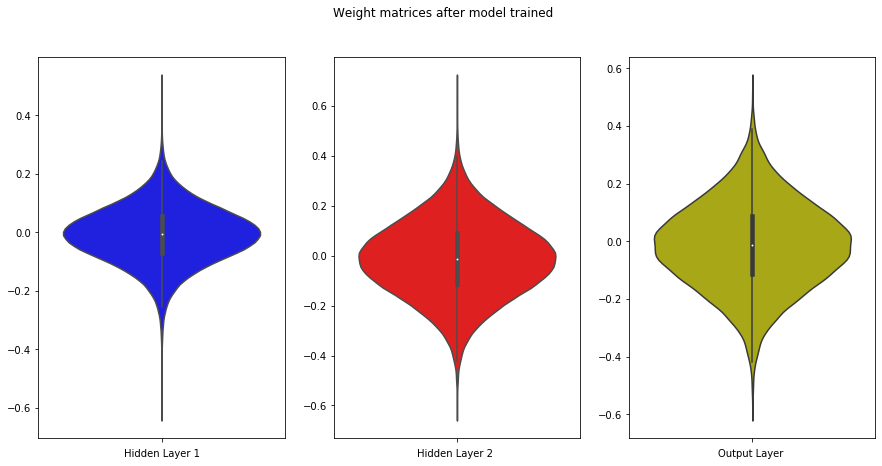

In [0]:
loss_plot(model_relu2)
weight_plot(model_relu2)

<h2>ii) MLP + Batch Normalization + Dropout + AdamOptimizer </h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop2 = Sequential()

model_drop2.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.5))

model_drop2.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.5))

model_drop2.add(Dense(125, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop2.add(BatchNormalization())
model_drop2.add(Dropout(0.5))

model_drop2.add(Dense(output_dim, activation='softmax'))


model_drop2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_21 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_17 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 250)               125250    
_________________________________________________________________
batch_normalization_22 (Batc (None, 250)               1000      
_________________________________________________________________
dropout_18 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 125)             

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.7758 - acc: 0.7553 - val_loss: 0.2188 - val_acc: 0.9340
Epoch 2/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.3571 - acc: 0.8941 - val_loss: 0.1681 - val_acc: 0.9476
Epoch 3/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.2773 - acc: 0.9179 - val_loss: 0.1353 - val_acc: 0.9590
Epoch 4/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.2378 - acc: 0.9301 - val_loss: 0.1146 - val_acc: 0.9639
Epoch 5/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.2079 - acc: 0.9394 - val_loss: 0.1025 - val_acc: 0.9680
Epoch 6/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.1820 - acc: 0.9472 - val_loss: 0.0951 - val_acc: 0.9703
Epoch 7/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.1653 - acc: 0.9516 - val_loss: 0.0889 -

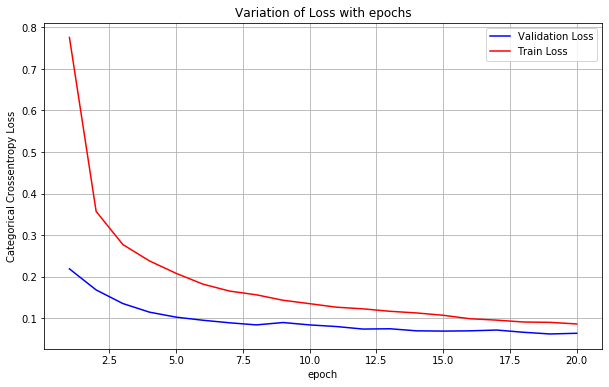

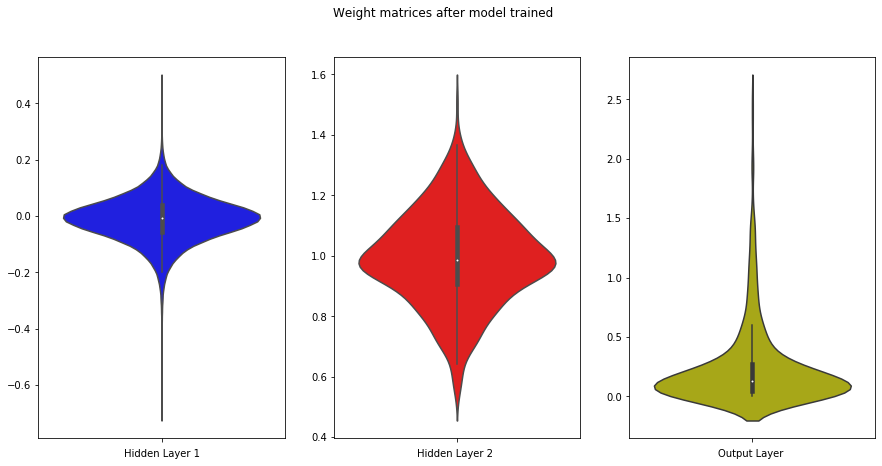

In [0]:
model_drop2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
loss_plot(model_drop2)
weight_plot(model_drop2)

## Architecture 3 : Layer1(700), Layer2(350), Layer3(200), Layer4(100), Layer5(50)

<h2>i) MLP + ReLU + ADAM </h2>

In [0]:
import warnings
warnings.filterwarnings("ignore") 

In [0]:
model_relu3 = Sequential()
model_relu3.add(Dense(700, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu3.add(Dense(350, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu3.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)))
model_relu3.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))
model_relu3.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed=None)))
model_relu3.add(Dense(output_dim, activation='softmax'))

print(model_relu3.summary())

model_relu3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 700)               549500    
_________________________________________________________________
dense_60 (Dense)             (None, 350)               245350    
_________________________________________________________________
dense_61 (Dense)             (None, 200)               70200     
_________________________________________________________________
dense_62 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_63 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_64 (Dense)             (None, 10)                510       
Total params: 890,710
Trainable params: 890,710
Non-trainable params: 0
_______________________________________________

Test score: 0.10133317776405511
Test accuracy: 0.9776


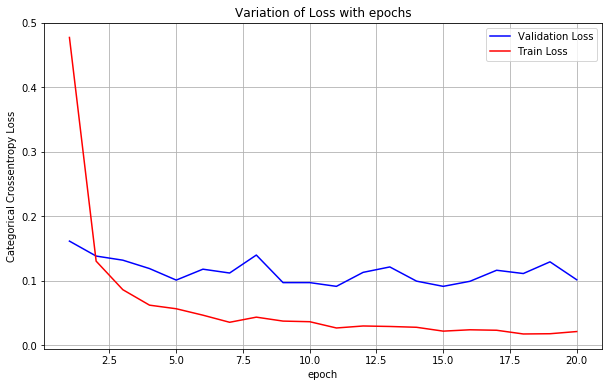

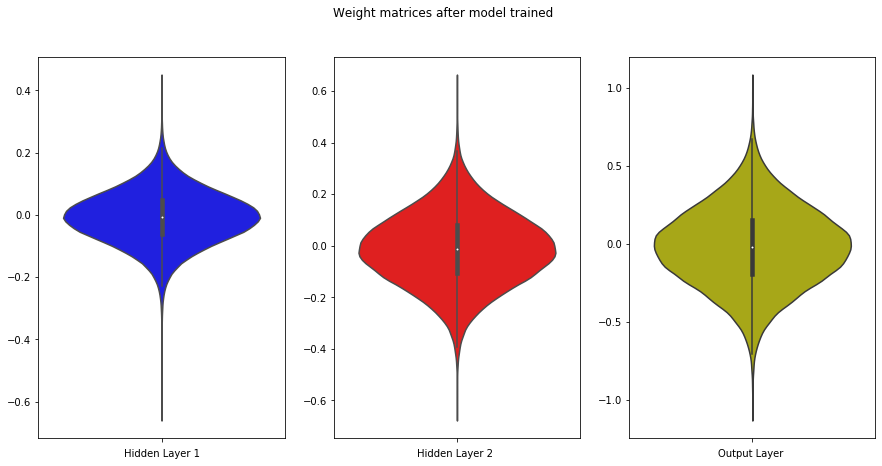

In [0]:
loss_plot(model_relu3)
weight_plot(model_relu3)

<h2>ii) MLP + Batch Normalization + Dropout + AdamOptimizer </h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop3 = Sequential()

model_drop3.add(Dense(700, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(350, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)))
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)))
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.3, seed=None)))
model_drop3.add(BatchNormalization())
model_drop3.add(Dropout(0.5))

model_drop3.add(Dense(output_dim, activation='softmax'))


model_drop3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 700)               549500    
_________________________________________________________________
batch_normalization_24 (Batc (None, 700)               2800      
_________________________________________________________________
dropout_20 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 350)               245350    
_________________________________________________________________
batch_normalization_25 (Batc (None, 350)               1400      
_________________________________________________________________
dropout_21 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 200)             

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 250us/step - loss: 1.5225 - acc: 0.5005 - val_loss: 0.3861 - val_acc: 0.8995
Epoch 2/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.6269 - acc: 0.8081 - val_loss: 0.2339 - val_acc: 0.9344
Epoch 3/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.4280 - acc: 0.8796 - val_loss: 0.1796 - val_acc: 0.9487
Epoch 4/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.3320 - acc: 0.9116 - val_loss: 0.1487 - val_acc: 0.9590
Epoch 5/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.2799 - acc: 0.9259 - val_loss: 0.1342 - val_acc: 0.9640
Epoch 6/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.2519 - acc: 0.9355 - val_loss: 0.1243 - val_acc: 0.9683
Epoch 7/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.2305 - acc: 0.9401 - val_loss: 0.

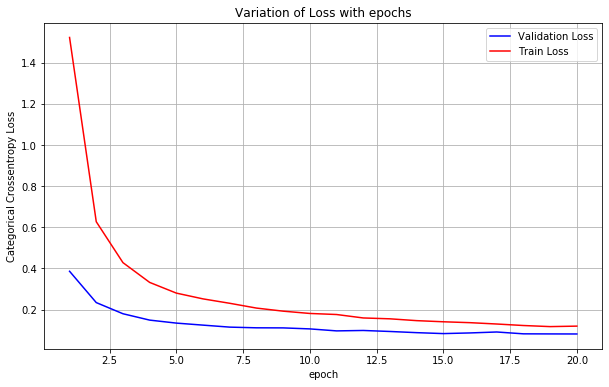

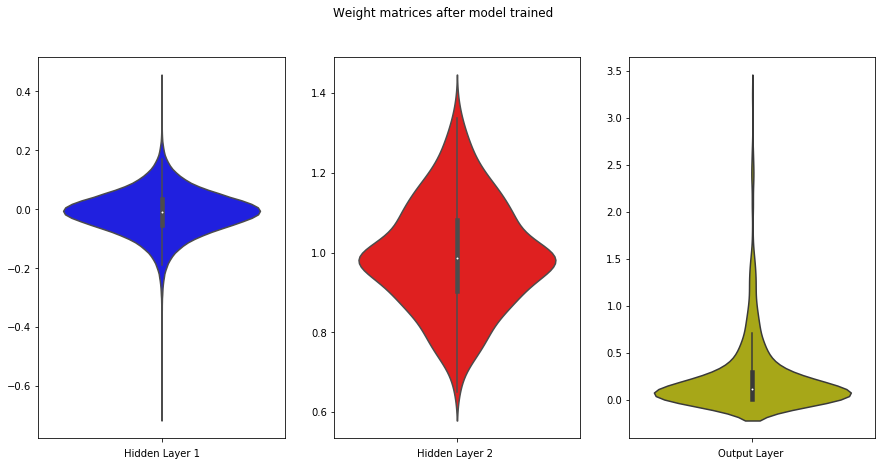

In [0]:
model_drop3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
loss_plot(model_drop3)
weight_plot(model_drop3)

## **Observations**:
1. Batch Normalization and Dropout layers reduce the variance of the model(prevent it from overfitting to the train data). The performance of the MLP on train data is much better with BN and Dropout.
2. All the models are able to minimize the loss and give close to 98% accuracy after just 15 epochs.
3. For MNIST data, evan a shallow NN works well, there's not much difference in the performance of models on increasing the depth of the neural network.